In [1]:
from selenium import webdriver 
import pandas as pd 
from bs4 import BeautifulSoup

# Code to Scrap Big Data Jobs

In [ ]:
driver = webdriver.Chrome('./chromedriver')

dataframe = pd.DataFrame(columns=['Title' ,'Location' ,'Company' ,'Salary' ,'Sponsored' ,'Desctiption'])

#Step 1 - Get the page

for i in range(0,500,10):
    driver.get('https://www.indeed.co.in/jobs?q=big+data&l=India&start=' + str(i))
    driver.implicitly_wait(4)

all_jobs = driver.find_elements_by_class_name('result')

for job in all_jobs:
    result_html = job.get_attribute('innerHTML')
    soup = BeautifulSoup(result_html , 'html.parser')
    
    try:
        title = soup.find('a' , class_="jobtitle").text.replace('\n' , '')
    except:
        title = 'None'
        
    try:
        location = soup.find(class_="location").text
    except:
        location = 'None'
    
    try:
        company = soup.find(class_="company").text.replace("\n" ,"").strip()
    except:
        company = 'None'
    
    try:
        salary = soup.find(class_="location").text.replace("\n" ,"").strip()
    except:
        salary = 'None'
        
    try:
        sponsored = soup.find(class_="sponsoredGray").text
        sponsored = "Sponsored"
    except:
        sponsored = 'Organic'
        
        
    sum_div = job.find_elements_by_class_name("summary")[0]
    try:
        sum_div.click()
    except:
        close_button = driver.find_elements_by_class_name('popover-x-button-close')[0]
        close_button.click()
        sum_div.click()
    
    job_desc = driver.find_element_by_id('vjs-desc').text
    
    dataframe = dataframe.append({'Title':title , 'Location':location, "Company" : company,
                                 "Sponsored" : sponsored , "Description" : job_desc} , 
                                ignore_index = True)
dataframe.to_csv('datasciece.csv' , index = "False")

# Code to scrap Data Science Jobs

In [3]:
from selenium import webdriver
import pandas as pd
from bs4 import BeautifulSoup

## Download the chromedriver from link in description
## And give the location of executable here
driver = webdriver.Chrome("./chromedriver")

dataframe = pd.DataFrame(columns=["Title","Location","Company","Salary","Sponsored","Description"])


for i in range(0,500,10):

	##Step1: Get the page
	driver.get("https://www.indeed.co.in/jobs?q=data+science&l=India&start="+str(i))
	driver.implicitly_wait(4)

	all_jobs = driver.find_elements_by_class_name('result')

	for job in all_jobs:

		result_html = job.get_attribute('innerHTML')
		soup = BeautifulSoup(result_html,'html.parser')

		try:
			title = soup.find("a",class_="jobtitle").text.replace('\n','')
		except:
			title = 'None'

		try:
			location = soup.find(class_="location").text
		except:
			location = 'None'

		try:
			company = soup.find(class_="company").text.replace("\n","").strip()
		except:
			company = 'None'

		try:
			salary = soup.find(class_="salary").text.replace("\n","").strip()
		except:
			salary = 'None'

		try:
			sponsored = soup.find(class_="sponsoredGray").text
			sponsored = "Sponsored"
		except:
			sponsored = "Organic"

		
		sum_div = job.find_elements_by_class_name("summary")[0]
		try:
			sum_div.click()
		except:
			close_button = driver.find_elements_by_class_name("popover-x-button-close")[0]
			close_button.click()
			sum_div.click()
			

		job_desc = driver.find_element_by_id('vjs-desc').text


		dataframe = dataframe.append({'Title':title,'Location':location,"Company":company,
						"Sponsored":sponsored,"Description":job_desc},
						ignore_index=True)


dataframe.to_csv("datascience.csv",index=False)



# Code for Analysis 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df1 = pd.read_csv('machinelearning.csv' , encoding = 'utf-8')
df2 = pd.read_csv('datascience.csv' , encoding = 'utf-8')
df3 = pd.read_csv('datascience2.csv' , encoding = 'utf-8')
df4 = pd.read_csv('data_analyst.csv' , encoding = 'utf-8')
df5 = pd.read_csv('ai.csv' , encoding = 'utf-8')

df = pd.concat([df1,df2,df3,df4,df5] , axis = 0).drop_duplicates()

df.shape

(1830, 6)

In [5]:
df = df[df.Sponsored != 'Sponsored']
df.shape

(1561, 6)

Find the company with the highest number of job openings 

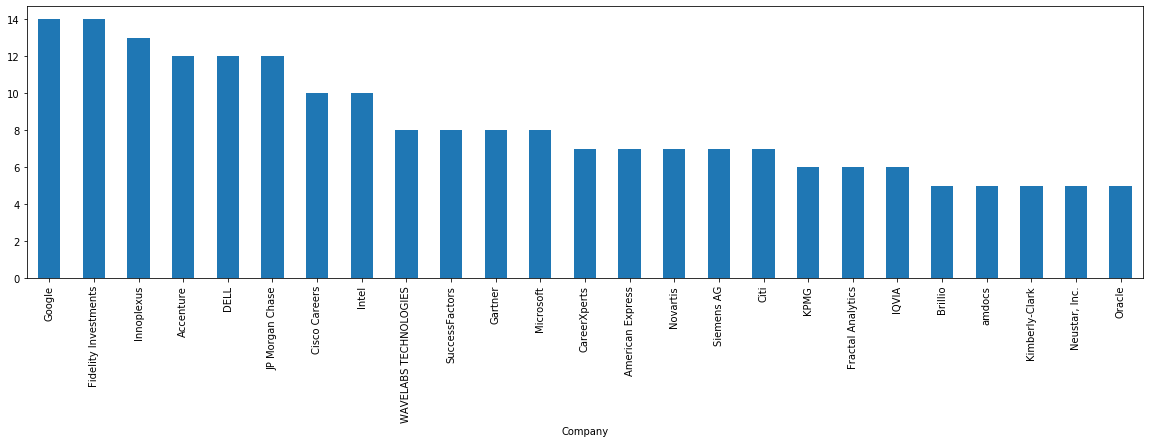

In [6]:
counts = df.groupby("Company").count()["Title"].sort_values(ascending = False)[:25]
counts.plot("bar" , figsize=(20,5))

Locations with the highest number of job postings

In [7]:
loc_counts = df.groupby('Location').count()["Title"].sort_values(ascending = False)[:15]
loc_counts
#loc_counts.plot("bar" , figsize=(10,10))

Location
Bengaluru, Karnataka          472
Pune, Maharashtra             223
Hyderabad, Telangana          158
Mumbai, Maharashtra           115
Gurgaon, Haryana               97
Delhi, Delhi                   60
India                          50
Chennai, Tamil Nadu            50
Noida, Uttar Pradesh           46
Ahmedabad, Gujarat             27
New Delhi, Delhi               16
Thiruvananthapuram, Kerala     14
Kolkata, West Bengal           14
Kochi, Kerala                  14
Navi Mumbai, Maharashtra       11
Name: Title, dtype: int64

In [8]:
def format_salary(row):
    salary = row['Salary']
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
        
    row["salary_min"] = salary_min.replace("₹" , "").replace("a month" , "").replace("a year" , "").replace("," , "")
    row["salary_max"] = salary_max.replace("₹" , "").replace("a month" , "").replace("a year" , "").replace("," , "")
    
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"]) *12
        
    return row


df_salary = df[df["Salary"] != 'None'].dropna()
df_salary = df_salary.apply(format_salary,axis = 1)

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"] , "coerce")
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"] , "coerce")


df_salary['salary_min'].mean()

253597.5625

In [9]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha()and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc 

In [10]:
import nltk 
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df['Description'].apply(cleanData)

In [11]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result , key = lambda kv : kv[1],reverse = True)
result_series = pd.Series({k:v for k,v in result})

In [12]:
#skills = ["tableau" , "power" , "qlik"]
#skills = ["aws" , "azure" ,"google"]
#skills = ["nltk" , "numpy" , "pandas","jupyter","opencv"]
#skills = ["statistics" , "machine" , "deep" , "neural" , "predictive"]
skills = ["experienced" , "intern" , "expert" , "fresher" , "begineer" , "intermediate"]


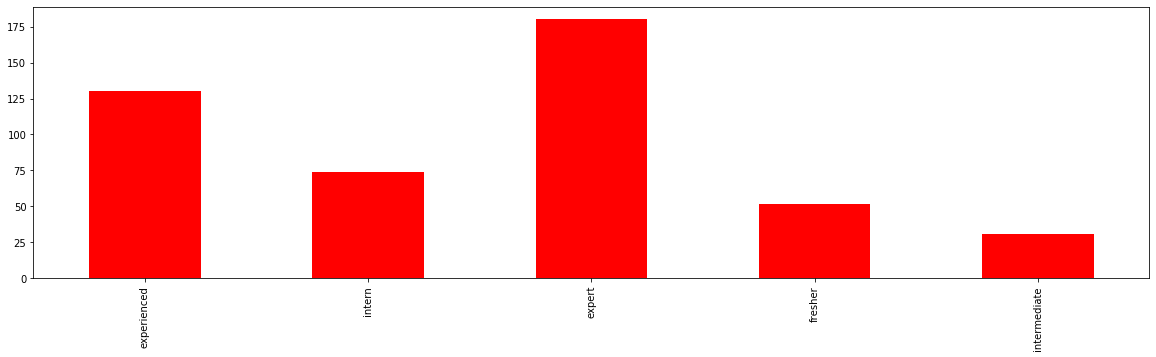

In [13]:
filter_series = result_series.filter(items = skills)
filter_series.plot('bar' , figsize=(20,5) , color = 'red')